In [112]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords


In [113]:
import re
import gensim
from gensim.models import Word2Vec

In [114]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\OM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [115]:
sample_text = """
Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.ML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine. The application of ML to business problems is known as predictive analytics.
Statistics and mathematical optimization methods comprise the foundations of machine learning. Data mining is a related field of study, focusing on exploratory data analysis via unsupervised learning.
From a theoretical viewpoint, probably approximately correct learning provides a mathematical and statistical framework for describing machine learning. Most traditional machine learning and deep learning algorithms can be described as empirical risk minimization under this framework.
"""

In [116]:
sentences = re.sub('[^a-zA-Z]', ' ', sample_text)
sentences = ' '.join([w for w in sentences.split() if len(w) > 1])
sentences = sentences.lower()

In [117]:
all_sentences = sent_tokenize(sentences)
all_words = [word_tokenize(sent) for sent in all_sentences]
print(all_words)

[['machine', 'learning', 'ml', 'is', 'field', 'of', 'study', 'in', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'development', 'and', 'study', 'of', 'statistical', 'algorithms', 'that', 'can', 'learn', 'from', 'data', 'and', 'generalize', 'to', 'unseen', 'data', 'and', 'thus', 'perform', 'tasks', 'without', 'explicit', 'instructions', 'within', 'subdiscipline', 'in', 'machine', 'learning', 'advances', 'in', 'the', 'field', 'of', 'deep', 'learning', 'have', 'allowed', 'neural', 'networks', 'class', 'of', 'statistical', 'algorithms', 'to', 'surpass', 'many', 'previous', 'machine', 'learning', 'approaches', 'in', 'performance', 'ml', 'finds', 'application', 'in', 'many', 'fields', 'including', 'natural', 'language', 'processing', 'computer', 'vision', 'speech', 'recognition', 'email', 'filtering', 'agriculture', 'and', 'medicine', 'the', 'application', 'of', 'ml', 'to', 'business', 'problems', 'is', 'known', 'as', 'predictive', 'analytics', 'statistics', 'and', 'mathematical'

In [118]:
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

data = all_words
data1 = sum(data, [])
print(data)

[['machine', 'learning', 'ml', 'field', 'study', 'artificial', 'intelligence', 'concerned', 'development', 'study', 'statistical', 'algorithms', 'learn', 'data', 'generalize', 'unseen', 'data', 'thus', 'perform', 'tasks', 'without', 'explicit', 'instructions', 'within', 'subdiscipline', 'machine', 'learning', 'advances', 'field', 'deep', 'learning', 'allowed', 'neural', 'networks', 'class', 'statistical', 'algorithms', 'surpass', 'many', 'previous', 'machine', 'learning', 'approaches', 'performance', 'ml', 'finds', 'application', 'many', 'fields', 'including', 'natural', 'language', 'processing', 'computer', 'vision', 'speech', 'recognition', 'email', 'filtering', 'agriculture', 'medicine', 'application', 'ml', 'business', 'problems', 'known', 'predictive', 'analytics', 'statistics', 'mathematical', 'optimization', 'methods', 'comprise', 'foundations', 'machine', 'learning', 'data', 'mining', 'related', 'field', 'study', 'focusing', 'exploratory', 'data', 'analysis', 'via', 'unsupervis

In [119]:
model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1, sg=0)


In [120]:
model.build_vocab(data)

In [121]:
model.train(
    data,                          
    total_examples=model.corpus_count,  
    epochs=100                     
)


(3911, 11200)

In [122]:
model.wv.most_similar('agriculture')

[('machine', 0.8370698690414429),
 ('mathematical', 0.8300243616104126),
 ('ml', 0.8297185301780701),
 ('data', 0.8290981650352478),
 ('learning', 0.8275934457778931),
 ('focusing', 0.8233487010002136),
 ('including', 0.8201423287391663),
 ('algorithms', 0.8189716339111328),
 ('many', 0.8137086629867554),
 ('computer', 0.8089029788970947)]

In [123]:
model.wv.doesnt_match(['machine' 'learning','data','ml','agriculture','algorithms'])

'agriculture'

In [124]:
model.wv['machine'].shape

(100,)

In [125]:
dat = []
for i in range(1, len(data1) - 2):
    context = [data1[i - 2], data1[i - 1], data1[i+1], data1[i + 2]]
    target = data1[i]
    dat.append((context, target))
print(dat[:5])

[(['framework', 'machine', 'ml', 'field'], 'learning'), (['machine', 'learning', 'field', 'study'], 'ml'), (['learning', 'ml', 'study', 'artificial'], 'field'), (['ml', 'field', 'artificial', 'intelligence'], 'study'), (['field', 'study', 'intelligence', 'concerned'], 'artificial')]


In [126]:
model.wv.get_normed_vectors()

array([[-0.03546797,  0.09772872, -0.0161597 , ...,  0.00153491,
        -0.05684697, -0.06319178],
       [-0.00156147,  0.07901049, -0.01428992, ..., -0.01985736,
        -0.0121013 , -0.0526629 ],
       [-0.00961406,  0.05062489,  0.01945806, ...,  0.04616893,
         0.02116798, -0.03219966],
       ...,
       [ 0.09015234,  0.01031168,  0.07289949, ..., -0.03916769,
         0.03184244, -0.10345075],
       [ 0.09730257,  0.00636086, -0.03836652, ..., -0.05884887,
        -0.03334609,  0.00993292],
       [-0.09116974,  0.08289673, -0.03156484, ..., -0.08187583,
         0.01906542, -0.12341733]], dtype=float32)

In [127]:
y=model.wv.index_to_key
len(y)

80

In [128]:
from sklearn.decomposition import PCA

In [129]:
pca=PCA(n_components=3)

In [130]:
X=pca.fit_transform(model.wv.get_normed_vectors())
X.shape

(80, 3)

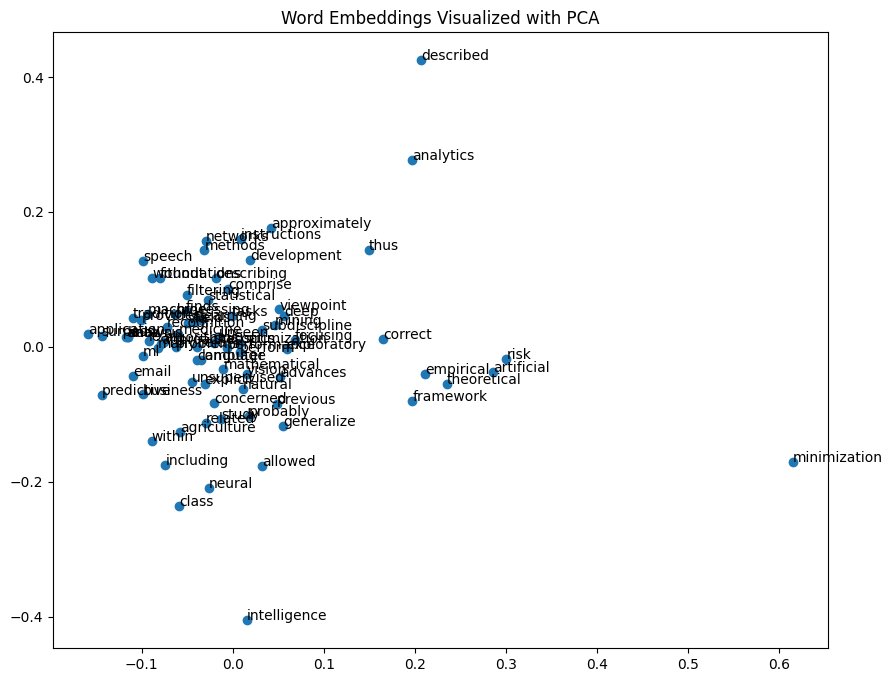

In [131]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1])
words = model.wv.index_to_key

for i, word in enumerate(words):
    plt.annotate(word, xy=(X[i, 0], X[i, 1]))
plt.title("Word Embeddings Visualized with PCA")
plt.show()